## 시각화
- https://github.com/boostcampaitech2/data-annotation-cv-level3-cv-07/blob/master/utils/visualize_box.ipynb
- bbox size 제외할 범위를 찾기 위해서 사용

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm

%matplotlib inline

In [27]:
# json 파일을 불러옵니다. 
dpath = '/opt/ml/input/data/ICDAR17_Korean'
fname = 'ufo/train.json'

path = os.path.join(dpath, fname)

with open(path, "r", encoding="utf8") as handle:
    ann = json.load(handle)

In [58]:
sort_lann = list(ann['images'])

# 원하는 이미지의 이름을 넣어 index 찾기
sort_lann.index('img_1097.jpg')

476

In [31]:
# 리스트에 이미지별로 points, 전사, orientation 담기
lpoints = []
ltranscript = []
lhv = []
for i in range(len(sort_lann)):
    temp_lp = []
    temp_lt = []
    temp_lhv = []
    for j in ann['images'][sort_lann[i]]['words']:
        temp_lp.append(ann['images'][sort_lann[i]]['words'][str(j)]['points'])
        temp_lt.append(ann['images'][sort_lann[i]]['words'][str(j)]['transcription'])
        temp_lhv.append(ann['images'][sort_lann[i]]['words'][str(j)]['orientation'])
        temp_lp = np.array(temp_lp).astype('int32').tolist()
    lpoints.append(temp_lp)
    ltranscript.append(temp_lt)
    lhv.append(temp_lhv)

In [36]:
img_path = os.path.join(dpath, 'images')
print(img_path)

/opt/ml/input/data/ICDAR17_Korean/images


In [37]:
# num : 뽑을 이미지 갯수, start : 시작할 위치
def visual_img(num, start):
    fig, ax = plt.subplots(nrows=num, ncols=2, figsize=(12, 5*num), constrained_layout=True)
    for i in tqdm(range(num)):
        img = cv2.imread(os.path.join(img_path, sort_lann[i+start]))
        oimg = cv2.imread(os.path.join(img_path, sort_lann[i+start]))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        oimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2RGB)
        
        for j in range(len(lpoints[i+start])):
            img = cv2.polylines(img,np.array([lpoints[i+start][j]],dtype=np.int32),True,(0,255,0),10)
        
        ax[i][0].imshow(img)
        ax[i][0].set_title(f'{sort_lann[i+start]}, {i}')
        ax[i][1].imshow(oimg)

    plt.show()

100%|██████████| 10/10 [00:02<00:00,  3.57it/s]


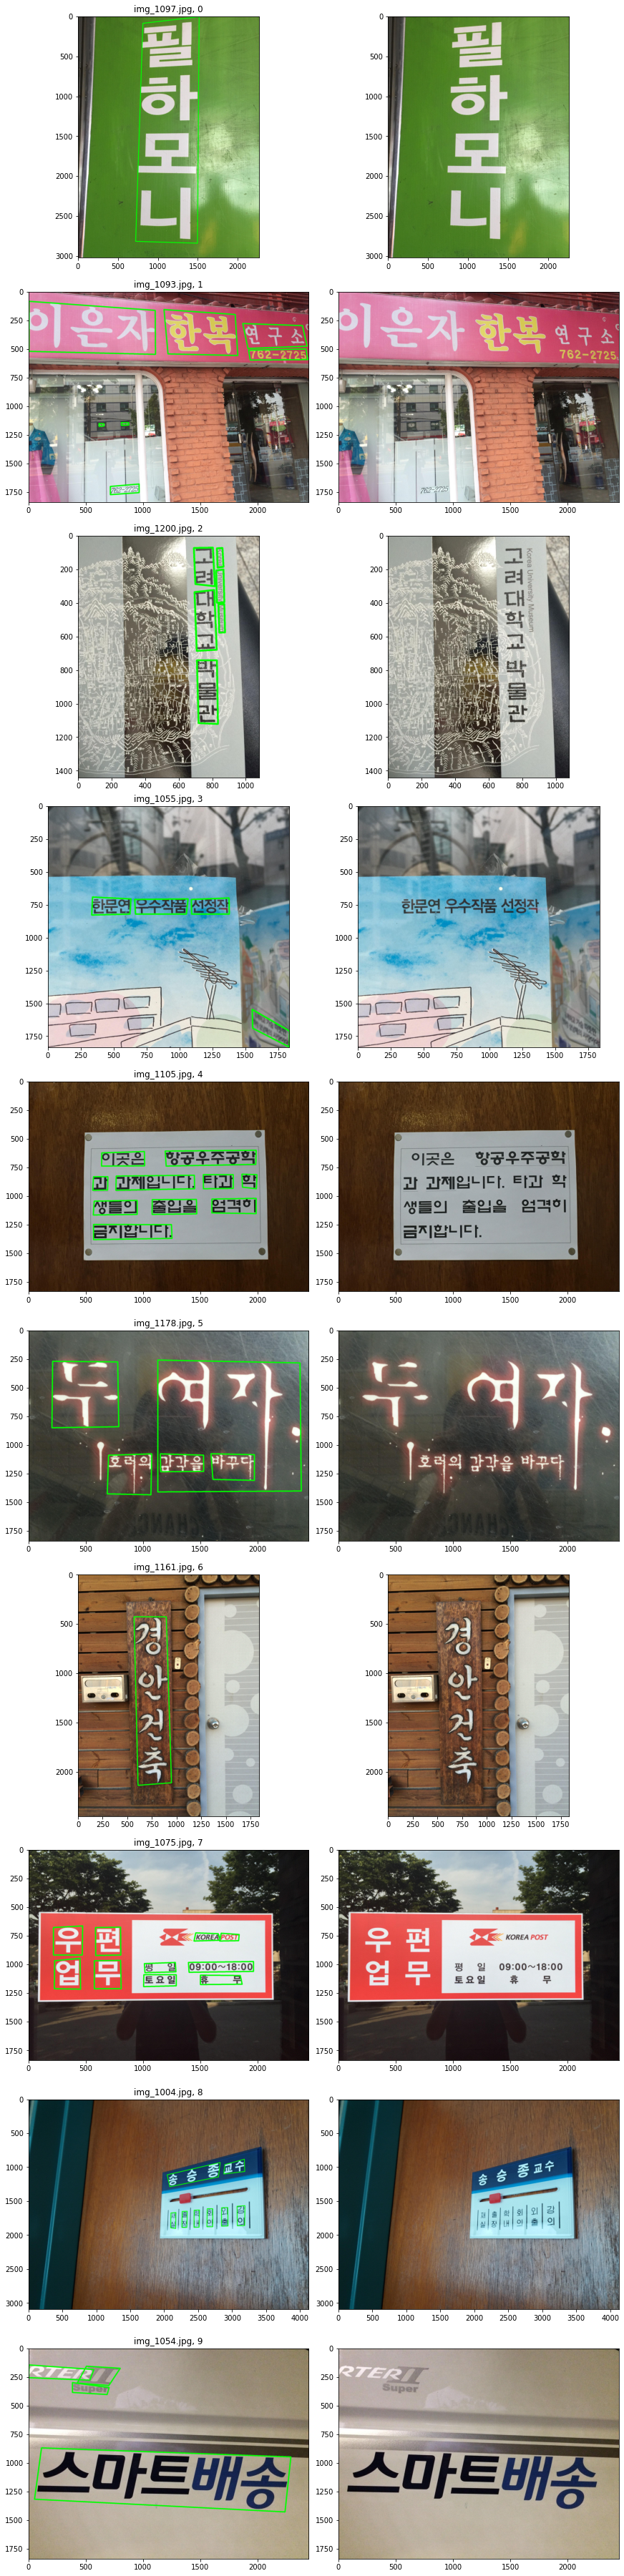

In [59]:
# 위에서 찾은 index를 넣어주면 확인 가능합니다.
visual_img(3, 476)